<a href="https://colab.research.google.com/github/vikas-hkk/Lild4o0d8/blob/main/Annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

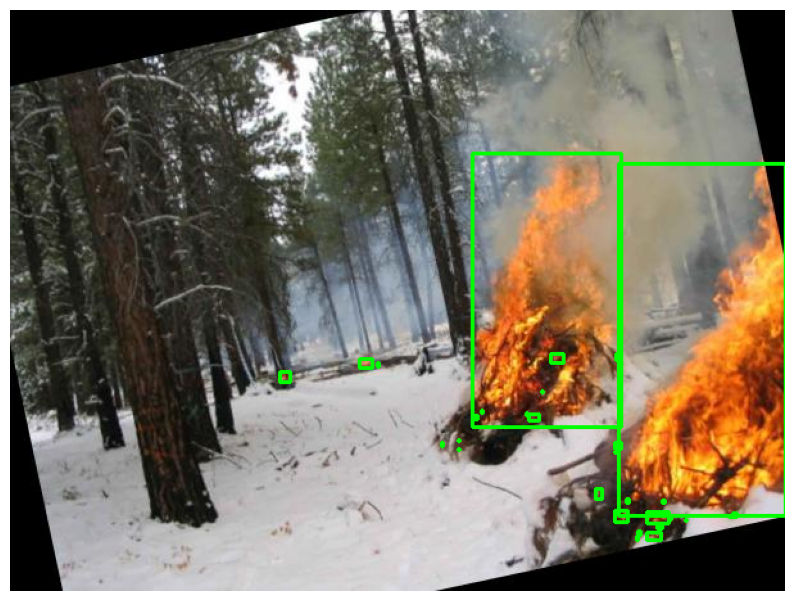

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('/content/fire-48_png.rf.f13d0e5fcd91c1d9496258d6aa3c8db0.jpg')

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_bound = np.array([0, 100, 100])
upper_bound = np.array([20, 255, 255])

mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:

    x, y, w, h = cv2.boundingRect(contour)

    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


image = cv2.imread('/content/fire_0065.jpg')


hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


lower_bound = np.array([0, 100, 100])
upper_bound = np.array([20, 255, 255])

mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

bounding_boxes = []


for contour in contours:

    x, y, w, h = cv2.boundingRect(contour)
    bounding_boxes.append([x,y,w,h])

with open('bounding_boxes.txt', 'w') as file:
  for idx , box in enumerate(bounding_boxes):
    x,y,w,h = box
    file.write(f"Box {idx + 1}: x={x}, y={y}, width={w}, height={h}\n")

from google.colab import files
files.download('bounding_boxes.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def convert_to_normalized_coordinates(annotations, image_width, image_height):
    normalized_annotations = []
    for annotation in annotations:
        parts = annotation.split(',')
        x = None
        y = None
        width = None
        height = None
        for part in parts:
            if 'x' in part:
                x = float(part.split('=')[-1].strip())
            elif 'y' in part:
                y = float(part.split('=')[-1].strip())
            elif 'width' in part:
                width = float(part.split('=')[-1].strip())
            elif 'height' in part:
                height = float(part.split('=')[-1].strip())


        if None not in [x, y, width, height]:

            x_center_normalized = x / image_width
            y_center_normalized = y / image_height
            width_normalized = width / image_width
            height_normalized = height / image_height


            normalized_annotations.append((x_center_normalized, y_center_normalized, width_normalized, height_normalized))

    return normalized_annotations


annotations = [
    "box = 1 , x = 112 , y = 249 , width = 100 , height = 50",
    "box = 2 , x = 200 , y = 300 , width = 80 , height = 40",

]
image_width = 400
image_height = 600

normalized_annotations = convert_to_normalized_coordinates(annotations, image_width, image_height)
print("Normalized annotations:", normalized_annotations)

Normalized annotations: [(0.28, 0.415, 0.25, 0.08333333333333333), (0.5, 0.5, 0.2, 0.06666666666666667)]
